# CMPS 140 Winter 2019 Assignment 4 Programming Component

## Problem 1

Given the dataset below, implement the logistic regression algorithm, optimizing the parameters using gradient descent and squared error as the loss function. See 18.6.4 from the textbook for details.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons

np.random.seed(33)
data, labels = make_moons(n_samples=100, noise=0.1)
colors = ['r' if y else 'b' for y in labels]
print(data.shape, labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

(100, 2) (100,)


<Figure size 640x480 with 1 Axes>

Intial Accuracy:62.0%
Step 1 Accuracy:80.0%, Loss: 28.320552327305432
Step 2 Accuracy:85.0%, Loss: 13.26693770812511
Step 3 Accuracy:84.0%, Loss: 10.340196115686899
Step 4 Accuracy:85.0%, Loss: 10.01826684053107
Step 5 Accuracy:85.0%, Loss: 9.885924935162974
Step 6 Accuracy:85.0%, Loss: 9.81517222105634
Step 7 Accuracy:85.0%, Loss: 9.774198807500989
Step 8 Accuracy:85.0%, Loss: 9.74819750955173
Step 9 Accuracy:85.0%, Loss: 9.730809250822025
Step 10 Accuracy:85.0%, Loss: 9.7187614238954
Step 11 Accuracy:84.0%, Loss: 9.710200859869655
Step 12 Accuracy:84.0%, Loss: 9.703999980220384
Step 13 Accuracy:84.0%, Loss: 9.699438988162564
Step 14 Accuracy:84.0%, Loss: 9.696042060636051
Step 15 Accuracy:84.0%, Loss: 9.693485849062244
Step 16 Accuracy:84.0%, Loss: 9.691545594374732
Step 17 Accuracy:84.0%, Loss: 9.690062088901257
Step 18 Accuracy:84.0%, Loss: 9.688920744431504
Step 19 Accuracy:84.0%, Loss: 9.688037958216425
Step 20 Accuracy:84.0%, Loss: 9.687352018380452
Step 21 Accuracy:84.0%, Loss:

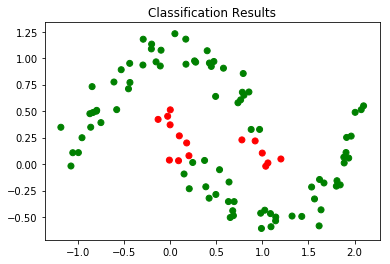

In [15]:
import math
from sklearn.metrics import *

def logistic(x, w):
    length = len(x)
    retval = []
    for i in range(0, length):
        retval.append(sigmoid(np.dot(x[i], np.transpose(w))))
    return retval
    
def loss_func(y, h):
    y = np.array(y)
    h = np.array(h)
    return np.sum((y - h)**2)

def loss_func_derivative(y, h, x):
#     length = len(y)
    y = np.array(y)
    h = np.array(h)
    x = np.array(x)
    return np.dot((y - h) * (h * (1 - h)), x)
    
def accuracy(y, h):
    return 100 * np.sum(y==h)/len(y)

def logistic_regression(x, y, loss_func_derivative, learning_rate, num_steps=100):
    w = np.ones(3)
    x = np.pad(x, [[0,0], [1,0]], mode='constant')

    print('Intial Accuracy:{}%'.format(accuracy(y, np.round(logistic(x, w)))))
    prev_loss = 0
    for step in range(num_steps):
        h = logistic(x, w)
        loss = loss_func(y, h)
        
        if math.fabs(loss - prev_loss) < 0.0000001:
            return w
         
        w += learning_rate * loss_func_derivative(y, h, x)
        
        print('Step {} Accuracy:{}%, Loss: {}'.format(step+1, accuracy(y, np.round(logistic(x, w))), loss))
        prev_loss = loss
    return w
    
learning_rate = 0.5
ws = logistic_regression(data, labels, loss_func_derivative, learning_rate)
yh = np.round(logistic(np.pad(data, [[0,0], [1,0]], mode='constant'), ws))
colors = ['g' if _yh==_y else 'r' for _yh, _y in zip(yh, labels.astype(np.int))]
plt.title('Classification Results')
plt.scatter(data[:,0], data[:,1], c=colors)

In [16]:
correct_w = np.array([ 1.        ,  1.15719784, -3.45275268])
print("ws", ws)
print("correct_w", correct_w)
np.testing.assert_allclose(ws, correct_w, rtol=1e-5)

ws [ 1.          1.15719784 -3.45275268]
correct_w [ 1.          1.15719784 -3.45275268]


## Problem 2

Implement a single perceptron below.

You can assume that both **x** and **w** will be iterables and b will be a single value. All of them will not be *None*.

In [189]:
def perceptron(x, w, b):
    length = len(x)
    sum = 0
    for i in range(0, length):
        sum += x[i] *w[i] + b
    
    if sum >= 0:
        return 1
    else:
        return 0
    

In [190]:
x = [1, 2]
w = [1, 1]
b = 0
y = perceptron(x, w, b)
print("y", y)
assert y == 1

b = -5
y = perceptron(x, w, b)
print("y", y)
assert y == 0

y 1
y 0
